In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# Step 3: Set Parameters and Load Data
IMG_SIZE = 64
NUM_CLASSES = 10

# 👇 This matches your actual folder name
DATASET_PATH = "/content/drive/MyDrive/Sign-Language-Digits-Dataset/Dataset"

data = []
labels = []

for digit in range(NUM_CLASSES):
    folder_path = os.path.join(DATASET_PATH, str(digit))
    image_files = glob.glob(os.path.join(folder_path, "*.JPG"))
    for file in image_files:
        img = load_img(file, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = img_to_array(img) / 255.0
        data.append(img_array)
        labels.append(digit)

X = np.array(data)
y = to_categorical(np.array(labels), NUM_CLASSES)

In [ ]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
# Step 5: Build CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 5: Build CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 6: Train the Model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 209ms/step - accuracy: 0.1044 - loss: 2.4508 - val_accuracy: 0.1000 - val_loss: 2.3024
Epoch 2/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 207ms/step - accuracy: 0.1222 - loss: 2.3002 - val_accuracy: 0.1645 - val_loss: 2.2974
Epoch 3/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - accuracy: 0.1657 - loss: 2.2693 - val_accuracy: 0.3194 - val_loss: 2.0618
Epoch 4/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - accuracy: 0.3056 - loss: 1.9414 - val_accuracy: 0.6194 - val_loss: 1.3575
Epoch 5/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 242ms/step - accuracy: 0.4999 - loss: 1.3915 - val_accuracy: 0.6710 - val_loss: 1.0610
Epoch 6/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - accuracy: 0.6046 - loss: 1.1517 - val_accuracy: 0.7613 - val_loss: 0.8891
Epoch 7/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.6253 - loss: 1.0795 - val_accuracy: 0.7935 - val_loss: 0.7768
Epoch 8/15
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - accuracy: 0.6579 - loss: 0.9219 - val_accuracy

In [ ]:
# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8610 - loss: 0.4219

✅ Test Accuracy: 0.8566


In [ ]:
# Step 8: Confusion Matrix and Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step

Confusion Matrix:
[[43  0  0  0  0  0  0  2  2  0]
 [ 1 54  4  0  0  0  0  1  0  0]
 [ 0  1 57  1  0  0  1  2  0  0]
 [ 0  0  1 50  0  1  0  0  0  0]
 [ 0  0  1  0 35  0  6  1  1  0]
 [ 0  0  0  1  1 43  0  0  0  0]
 [ 0  0  9  0  2  0 37  2  0  0]
 [ 1  0  1  0  4  0  4 42  0  0]
 [ 0  0  1  0  5  0  1  7 38  2]
 [ 0  1  0  0  1  1  0  0  4 43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        47
           1       0.96      0.90      0.93        60
           2       0.77      0.92      0.84        62
           3       0.96      0.96      0.96        52
           4       0.73      0.80      0.76        44
           5       0.96      0.96      0.96        45
           6       0.76      0.74      0.75        50
           7       0.74      0.81      0.77        52
           8       0.84      0.70      0.77        54
           9       0.96      0.86      0.91 

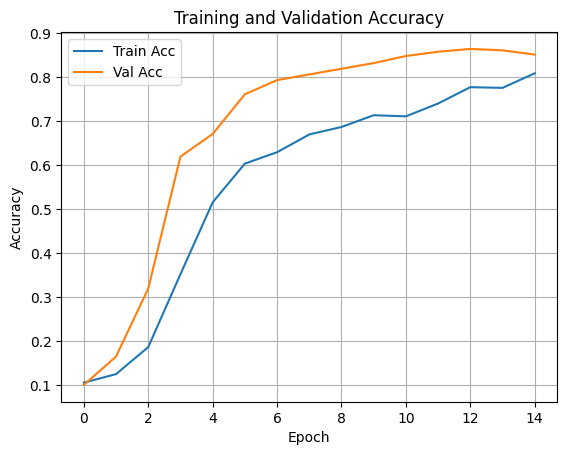

In [ ]:
# Step 9: Plot Accuracy Graph
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
model.save('/content/drive/MyDrive/asl_digit_model.h5')